# IIC-2433 Minería de Datos UC

# CNN para reconocer dígitos

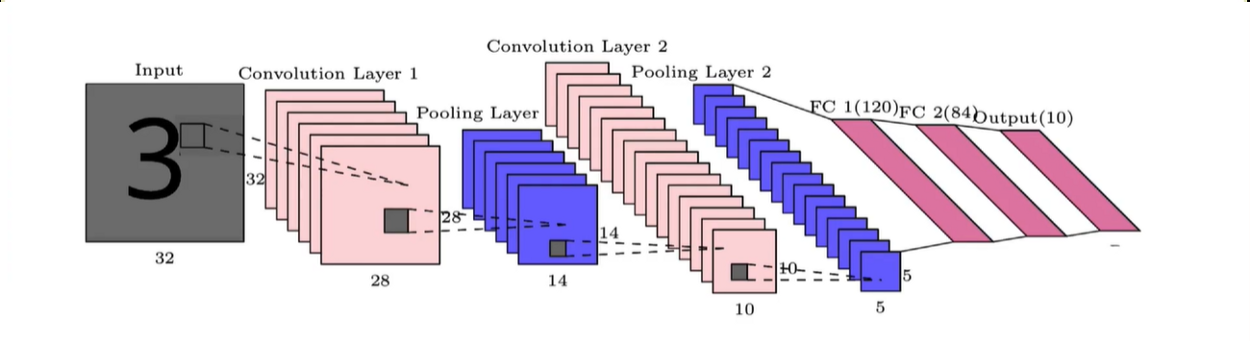

In [1]:
from IPython.display import Image
Image(filename='lenet.png')

### Cabeceras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Cargamos los datos

In [3]:
train_data = pd.read_csv('train.csv')

### Nos quedamos solo con los datos en X (imágenes) y dejamos en Y la variable objetivo

In [4]:
X_train = train_data.drop(columns=['label']).values / 255.0
Y_train = train_data['label'].values

In [5]:
X_train.shape

(42000, 784)

### Hacemos un reshape ya que cada imagen es de 28 x 28

In [6]:
X_train = X_train.reshape(-1, 28, 28, 1)

In [7]:
X_train.shape

(42000, 28, 28, 1)

### Vamos a crear una partición de validación desde training para no usar la partición de test

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=46)

### Esta es una función que hace aumento de datos aplicando transformaciones sobre las imágenes (rotaciones, zoom, ...)

In [9]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=10, # Degree range for random rotations.
    zoom_range=0.1, # Range for random zoom
    width_shift_range=0.1, # fraction of total width (traslation)
    height_shift_range=0.1, # fraction of total height (traslation)
    horizontal_flip=False, # Randomly flip inputs horizontally.
    vertical_flip=False # Randomly flip inputs vertically.
)
datagen.fit(X_train)

### Vamos a declarar la arquitectura de la red con la estrategia 'sequential' de Keras

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

### Vamos a usar adam para tener learning rate adaptivo

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Y el learning rate los vamos a modificar según el accuracy en validación

In [12]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

### Al ingestar imágenes con data generator, hacemos aumento de datos en tiempo real durante el entrenamiento

In [13]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=64),
    epochs=20,
    validation_data=(X_val, Y_val),
    verbose=2,
    steps_per_epoch=X_train.shape[0] // 64,
    callbacks=[learning_rate_reduction]
)

Epoch 1/20
590/590 - 29s - loss: 0.3703 - accuracy: 0.8796 - val_loss: 0.0785 - val_accuracy: 0.9748 - lr: 0.0010 - 29s/epoch - 49ms/step
Epoch 2/20
590/590 - 27s - loss: 0.1256 - accuracy: 0.9617 - val_loss: 0.0432 - val_accuracy: 0.9867 - lr: 0.0010 - 27s/epoch - 47ms/step
Epoch 3/20
590/590 - 27s - loss: 0.0948 - accuracy: 0.9720 - val_loss: 0.0406 - val_accuracy: 0.9879 - lr: 0.0010 - 27s/epoch - 46ms/step
Epoch 4/20
590/590 - 27s - loss: 0.0748 - accuracy: 0.9780 - val_loss: 0.0292 - val_accuracy: 0.9905 - lr: 0.0010 - 27s/epoch - 46ms/step
Epoch 5/20
590/590 - 27s - loss: 0.0708 - accuracy: 0.9792 - val_loss: 0.0271 - val_accuracy: 0.9917 - lr: 0.0010 - 27s/epoch - 47ms/step
Epoch 6/20
590/590 - 27s - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.0269 - val_accuracy: 0.9900 - lr: 0.0010 - 27s/epoch - 46ms/step
Epoch 7/20
590/590 - 27s - loss: 0.0598 - accuracy: 0.9822 - val_loss: 0.0249 - val_accuracy: 0.9919 - lr: 0.0010 - 27s/epoch - 47ms/step
Epoch 8/20
590/590 - 27s - loss: 0

In [14]:
loss, accuracy = model.evaluate(X_train, Y_train)
print("Final training loss: {:.8f}".format(loss))
print("Final training accuracy: {:.4%}".format(accuracy))

1182/1182 [==============================] - 14s 11ms/step - loss: 0.0073 - accuracy: 0.9979
Final training loss: 0.00726804
Final training accuracy: 99.7857%


### Finalmente miramos las curvas de accuracy y función de pérdida

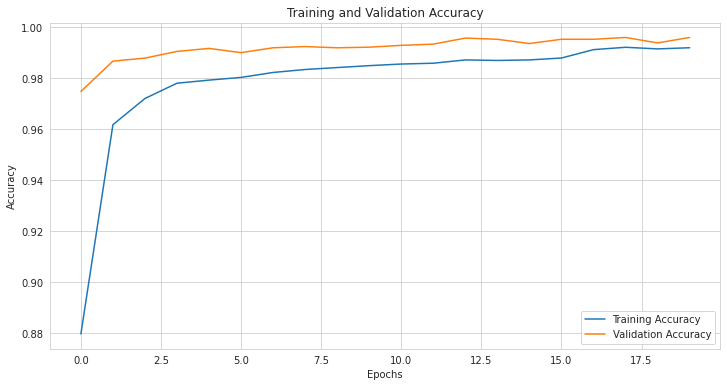

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

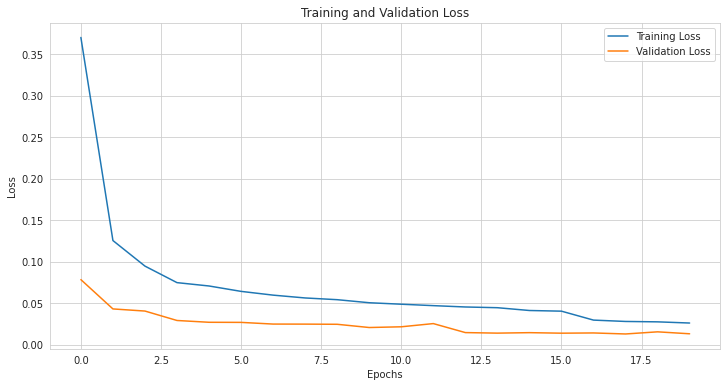

In [16]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()